In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import slots

# Test multiple strategies for the same bandit probabilities
probs = [0.4, 0.9, 0.8]

strategies = [{'strategy': 'eps_greedy', 'regret': [],
               'label': '$\epsilon$-greedy ($\epsilon$=0.1)'},
              {'strategy': 'softmax', 'regret': [],
               'label': 'Softmax ($T$=0.1)'},
              {'strategy': 'ucb', 'regret': [],
               'label': 'UCB1'},
              {'strategy': 'bayesian', 'regret': [],
               'label': 'Bayesian bandit'},
              ]

for s in strategies:
    s['mab'] = slots.MAB(probs=probs, live=False)

# Run trials and calculate the regret after each trial
for t in range(10000):
    for s in strategies:
        s['mab']._run(s['strategy'])
        s['regret'].append(s['mab'].regret())



/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
s['mab'].run()

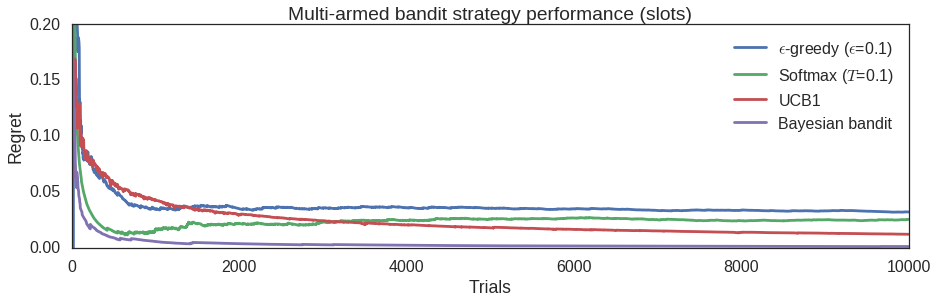

In [3]:
# Pretty plotting
sns.set_style('white')
sns.set_context('poster')

plt.figure(figsize=(15,4))

for s in strategies:
    plt.plot(s['regret'], label=s['label'])

plt.legend()
plt.xlabel('Trials')
plt.ylabel('Regret')
plt.title('Multi-armed bandit strategy performance (slots)')
plt.ylim(0,0.2);

In [23]:
b = slots.MAB(3, live=False, probs=[0.2,0.2,1])
b.run(trials=100, strategy="ucb")

In [24]:
b.est_payouts()


array([ 0.24691358,  0.        ,  0.99883856])

In [25]:
b.best()

2

In [28]:
b.pulls

array([  8.,   6.,  86.])

In [50]:
b.eps_greedy({"epsilon":0.3})

2

In [53]:
for i in range(19):
    print(b.eps_greedy({"epsilon":0.9}))

0
1
0
0
0
1
1
1
2
1
1
2
0
0
1
1
1
2
0
